## Upload of the csv file

In [1]:
import boto3
bucket_name = 'dataminds-warehouse'
s3_file_key = 'HousingPrices-Amsterdam-August-2021.csv'      # e.g. 'folder/myfile.txt'
local_file_path = 'eda.csv'        # Local destination

# Create an S3 client (remove `bucket_name` here — not a valid argument for boto3.client)
s3 = boto3.client(
    's3',
    region_name='us-east-1'
    # aws_access_key_id='your_access_key',
    # aws_secret_access_key='your_secret_key'
)

# Download the file
try:
    s3.download_file(bucket_name, s3_file_key, local_file_path)
    print(f"✅ File downloaded successfully from s3://{bucket_name}/{s3_file_key} to {local_file_path}")
except Exception as e:
    print("❌ Error downloading file:", e)

✅ File downloaded successfully from s3://dataminds-warehouse/HousingPrices-Amsterdam-August-2021.csv to eda.csv


## Reading the Data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

amsterdam_data = pd.read_csv("eda.csv") # first I would like to load the dataset to see what we have there

amsterdam_data.head() # and now I just view the basic structure

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [22]:
amsterdam_data.shape

(924, 8)

## Looking at rows, columns, type

In [23]:
print("Shape:", amsterdam_data.shape) # here I wanted to see the rows and columns

print("Columns:", amsterdam_data.columns.tolist()) # column names
print("Type", amsterdam_data.dtypes) # type

amsterdam_data.info() # and data types and missing values that we have in the dataset 

Shape: (924, 8)
Columns: ['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat']
Type Unnamed: 0      int64
Address        object
Zip            object
Price         float64
Area            int64
Room            int64
Lon           float64
Lat           float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


## Handling of missing values

In [24]:
missing_values = amsterdam_data.isnull().sum() # first let us count how many missing values we actually have in each column

missing_values[missing_values > 0] # and then we look at only only columns with missing values

Price    4
dtype: int64

## Division on Numerical and Categorical columns

In [26]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # numberical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist() # categorical 

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Unnamed: 0', 'Price', 'Area', 'Room', 'Lon', 'Lat']
Categorical columns: ['Address', 'Zip']


# Univariate Analysis Part

## Central tendency of numerical features

In [29]:
for col in numerical_cols: # first I wanted to know the mean, meadian, and mode of the data
    print(f"--- {col} ---")
    print(f"Mean:   {amsterdam_data[col].mean():.2f}")
    print(f"Median: {amsterdam_data[col].median():.2f}")
    print(f"Mode:   {amsterdam_data[col].mode().values[0]}")
    print()

--- Unnamed: 0 ---
Mean:   462.50
Median: 462.50
Mode:   1

--- Price ---
Mean:   622065.42
Median: 467000.00
Mode:   375000.0

--- Area ---
Mean:   95.95
Median: 83.00
Mode:   78

--- Room ---
Mean:   3.57
Median: 3.00
Mode:   3

--- Lon ---
Mean:   4.89
Median: 4.89
Mode:   4.855832

--- Lat ---
Mean:   52.36
Median: 52.36
Mode:   52.352385



## Histogram

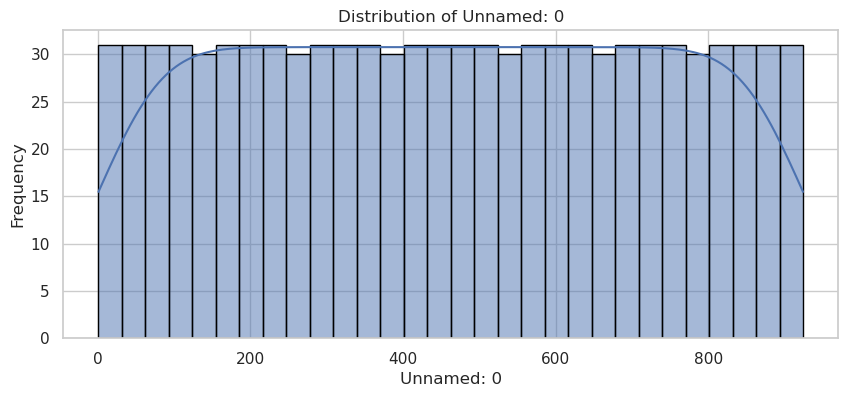

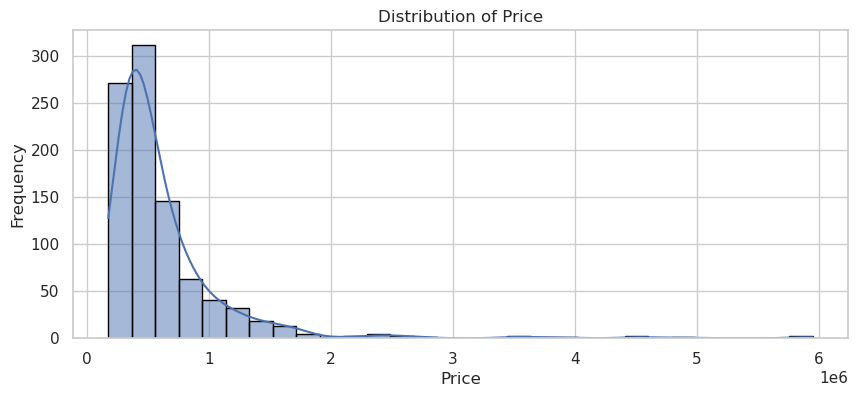

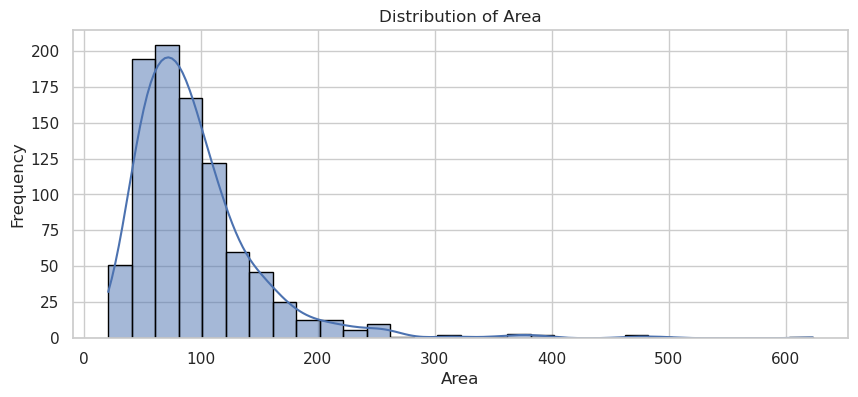

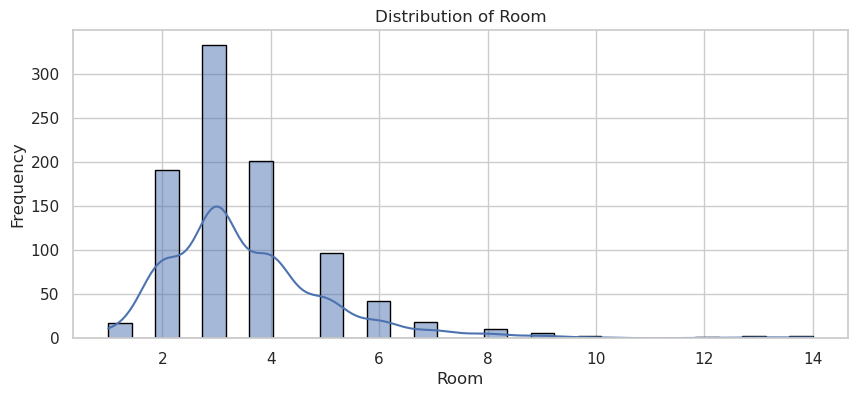

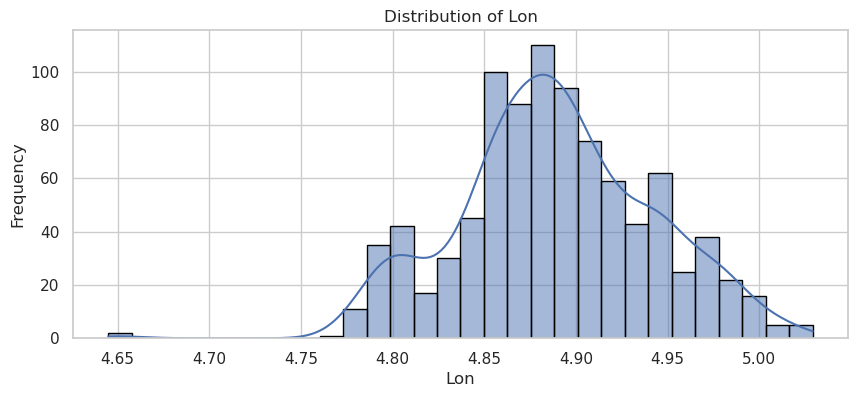

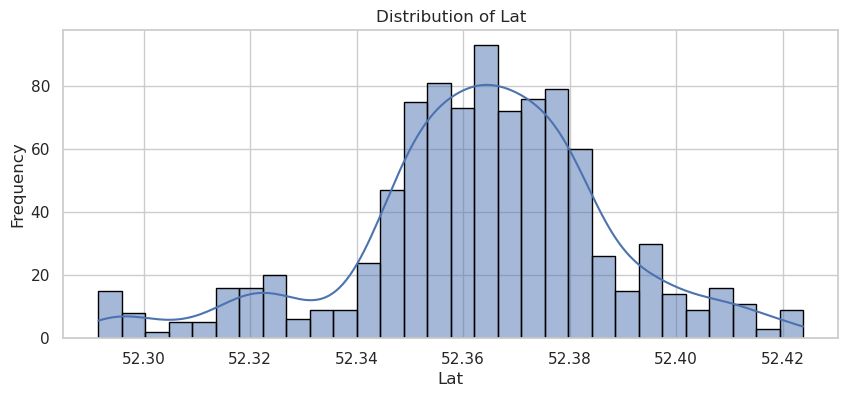

In [30]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(amsterdam_data[col], kde=True, bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Boxplot

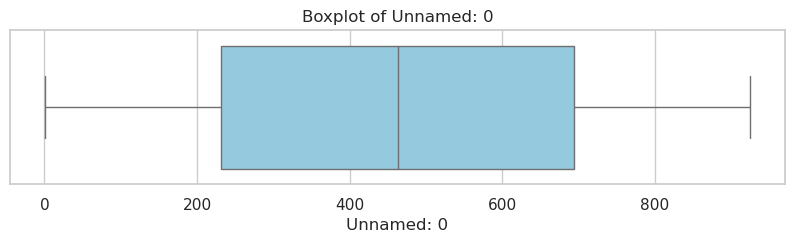

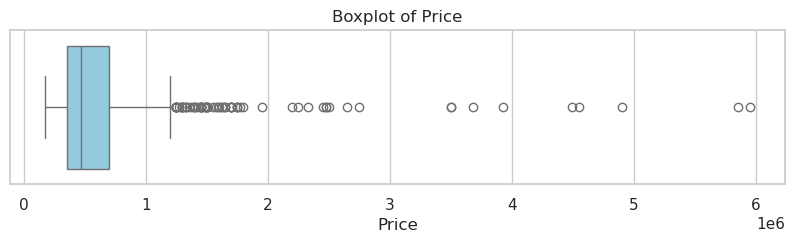

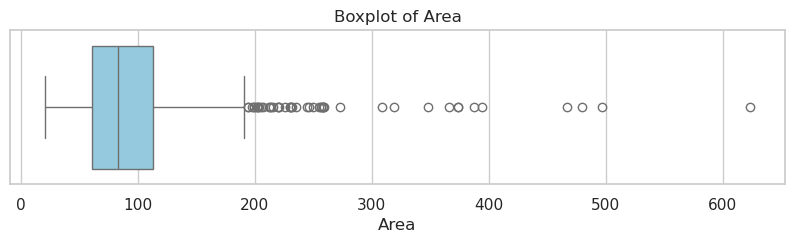

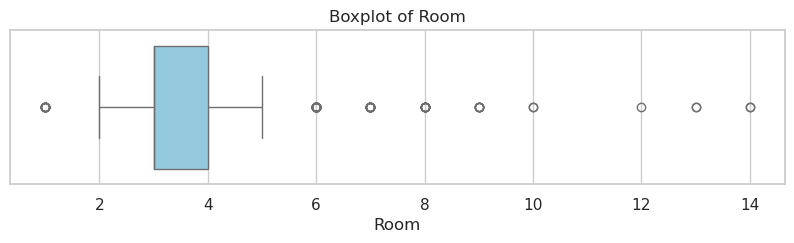

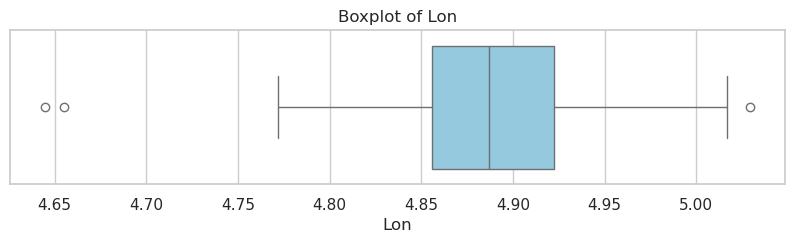

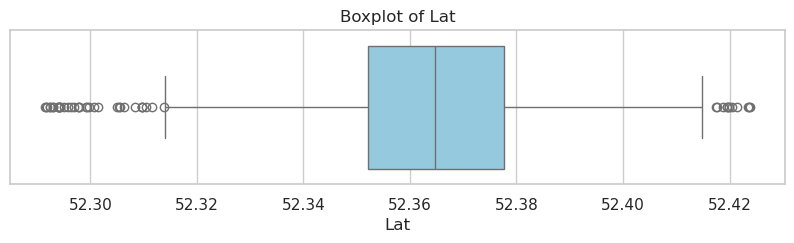

In [31]:
for col in numerical_cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=amsterdam_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

## Violin Plot

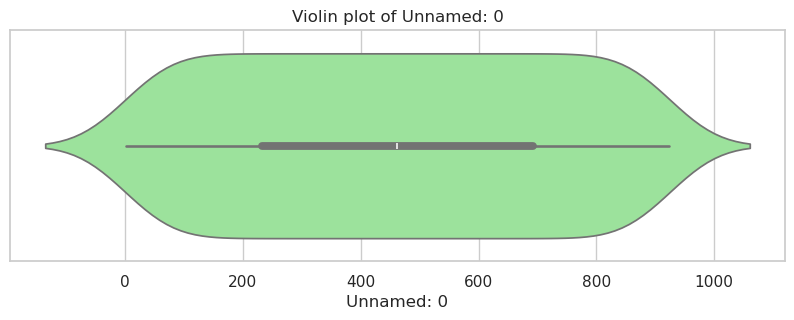

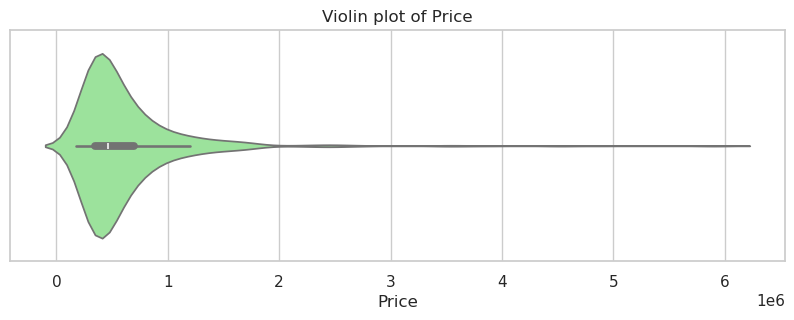

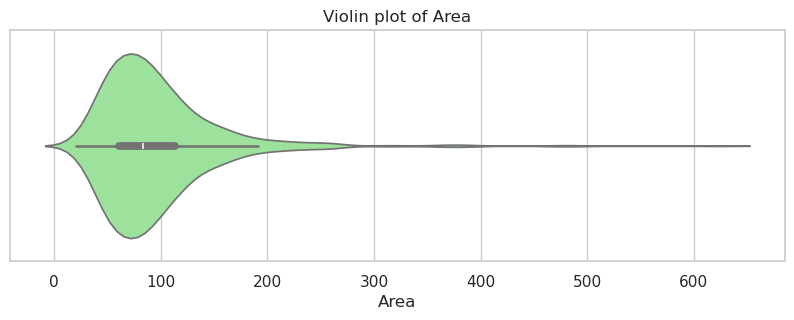

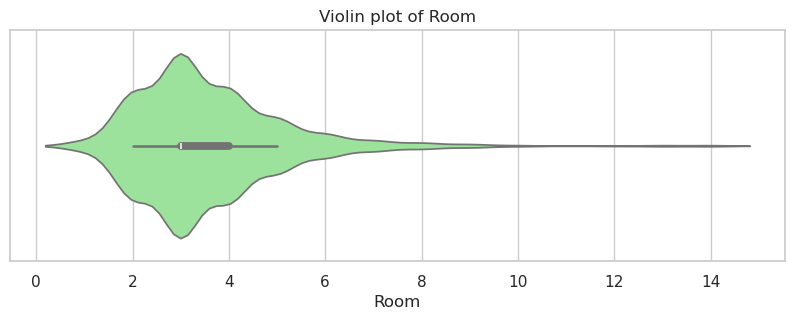

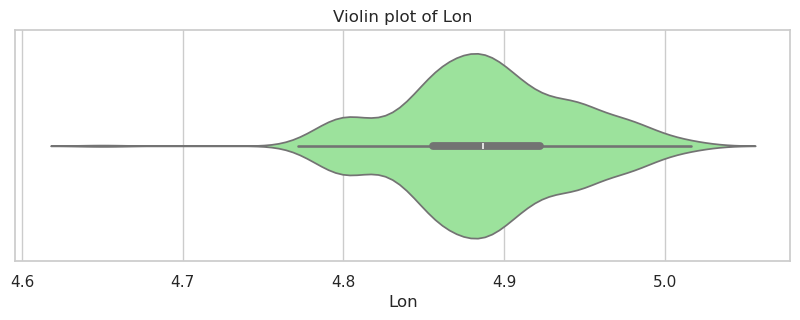

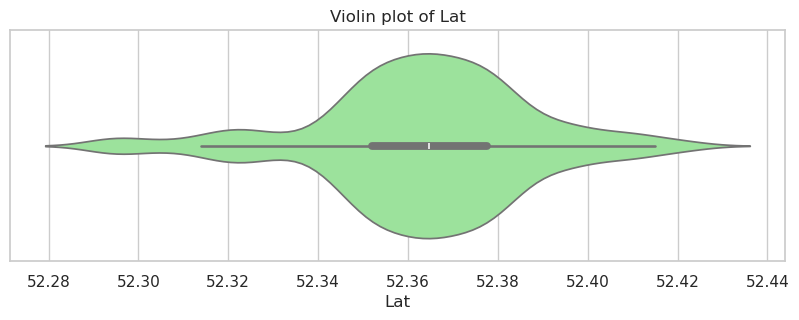

In [33]:
for col in numerical_cols:
    plt.figure(figsize=(10, 3))
    sns.violinplot(x=amsterdam_data[col], color='lightgreen')
    plt.title(f'Violin plot of {col}')
    plt.show()

## Summary Table for Numerical Columns

In [34]:
summary_table = pd.DataFrame({
    'Mean': amsterdam_data[numerical_cols].mean(),
    'Median': amsterdam_data[numerical_cols].median(),
    'Mode': [amsterdam_data[col].mode().iloc[0] for col in numerical_cols],
    'Std Dev': amsterdam_data[numerical_cols].std(),
    'Min': amsterdam_data[numerical_cols].min(),
    'Max': amsterdam_data[numerical_cols].max(),
    'Missing Values': amsterdam_data[numerical_cols].isnull().sum()
})

summary_table = summary_table.round(2) # I decided to round it for a nice readability
summary_table


,Mean,Median,Mode,Std Dev,Min,Max,Missing Values
Unnamed: 0,462.50,462.50,1.00,266.88,1.00,924.00,0
Price,622065.42,467000.00,375000.00,538994.18,175000.00,5950000.00,4
Area,95.95,83.00,78.00,57.45,21.00,623.00,0
Room,3.57,3.00,3.00,1.59,1.00,14.00,0
Lon,4.89,4.89,4.86,0.05,4.64,5.03,0
Lat,52.36,52.36,52.35,0.02,52.29,52.42,0


# Multivariate EDA

## Correlation Heatmap

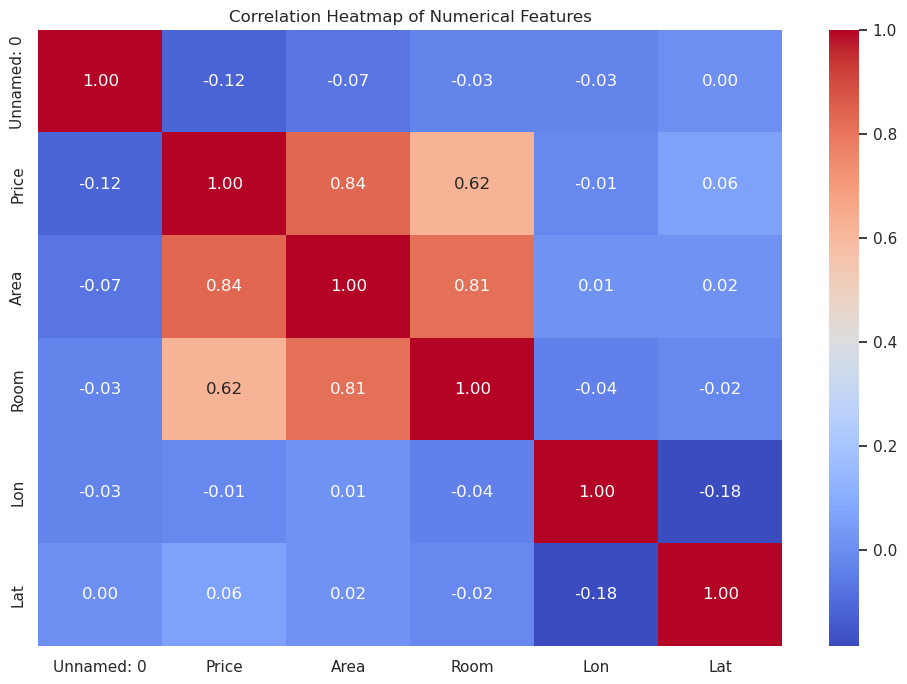

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(amsterdam_data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Pairplot

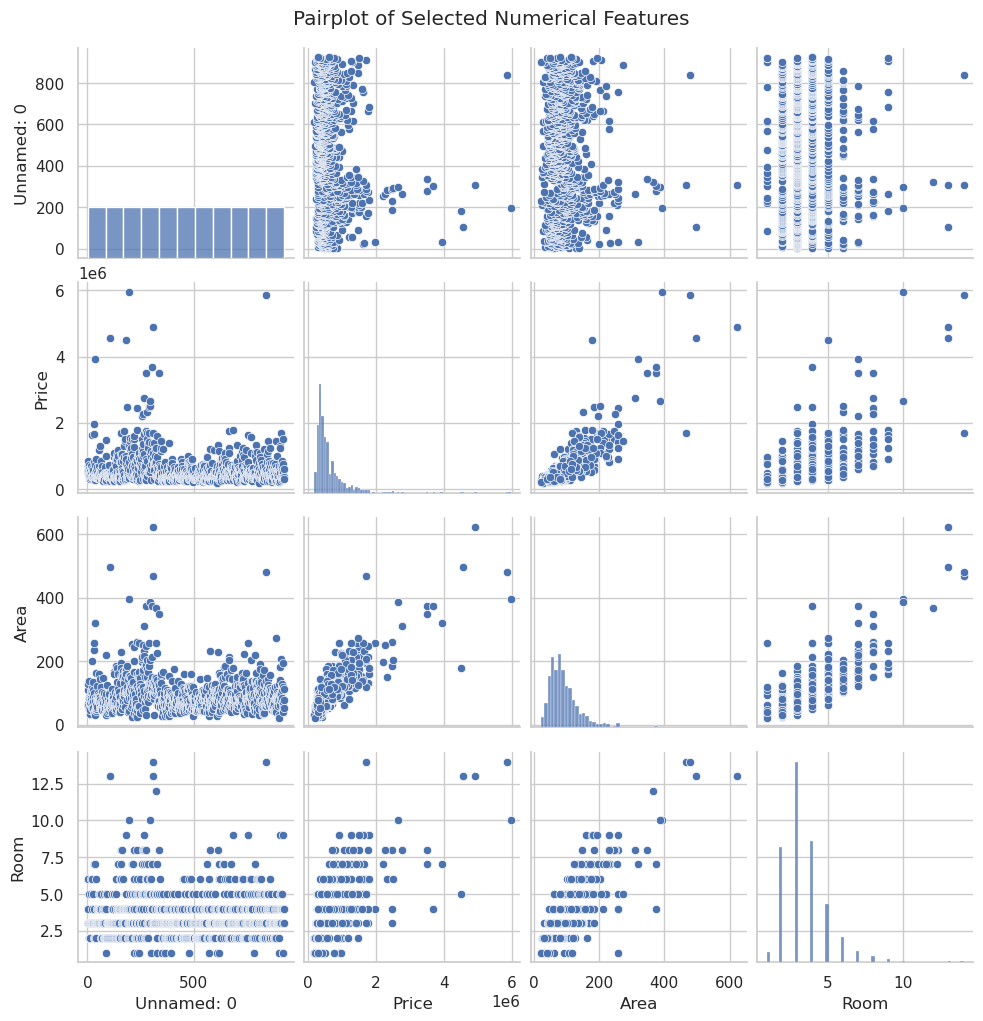

In [53]:
import seaborn as sns

subset = numerical_cols[:4] 
sns.pairplot(amsterdam_data[subset])
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()